In [1]:
#PA 3 template code
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

def create_blank(height, width, img_type, channels):
    """ Create new image(numpy array) """
    image = np.zeros((height, width, channels), img_type)
    return image

def DFTShift(I):
    h, w = I.shape[:2]

    #divide the size in 2 so we can get quadrants
    cx1 = cx2 = w // 2 #floor divide, num of columns
    cy1 = cy2 = h // 2 #num of rows

    ret = np.empty(I.shape, I.dtype)

    # if the size is odd, then adjust the bottom/right quadrants
    if w % 2 != 0:
        cx2 += 1
    if h % 2 != 0:
        cy2 += 1

    # these quads look like
    # Q1 Q4
    # Q2 Q3
    # swap quadrants

    # swap q1 and q3
    ret[h-cy1:, w-cx1:] = I[0:cy1 , 0:cx1 ]   # q1 to q3
    ret[0:cy2 , 0:cx2 ] = I[h-cy2:, w-cx2:]   # q3 to q1

    # swap q2 and q4
    ret[0:cy2 , w-cx2:] = I[h-cy2:, 0:cx2 ]   # q2 to q4
    ret[h-cy1:, 0:cx1 ] = I[0:cy1 , w-cx1:]   # q4 to q2

    #return the shifted DFT
    return ret

#void in C++ since it passed by reference
def DFT(Input):
    # I:    [In]   Gray Image
    # Real: [Out]  Real part of DFT
    # Imag: [Out]  Imaginary part of DFT

    #Converting input image to type float
    I = np.float32(Input) #convert to float 32 1 channel

    #Creating two channel input to represent
    channels = [I, create_blank(I.shape[0], I.shape[1], np.float32, 1)]
    II = cv.merge(channels) #output of merge goes into II

    #Calculate DFT
    cv.dft(II, II) #source, destination

    #Returning results
    channels = cv.split(II, channels) #source, destination
    Real = channels[0];
    Imag = channels[1];

    return (Real, Imag)

#void originally since it passes by reference in C++
def IDFT(Real, Imag):
    # I:    [Out] Gray Image
    # Real: [In]  Real part of DFT
    # Imag: [In]  Imaginary part of DFT

    #might need to create blank for II with size of Real

    # Merging Real and Imag
    channels = [ Real, Imag ]
    II = cv.merge(channels)

    # Calculate IDFT
    cv.dft(II, II, cv.DFT_INVERSE)

    # Returning results
    channels = cv.split(II)
    J = cv.magnitude(channels[0], channels[1]) #output array magnitude
    cv.normalize(J, J, 0, 255, cv.NORM_MINMAX)
    #src, dst, alpha, beta, normType=NORM_MINMAX for dense arrays

    I = np.uint8(J)

    return I

def NotchFilter(s, lowerCutOff, upperCutOff):
    # int s: size of filter (e.g. 512 for 512x512)
    # int lowerCutOff: radius of smaller circle (e.g. 40)
    # int upperCutOff: radius of bigger circle (e.g. 60)

    #Sanity check
    assert(lowerCutOff < upperCutOff)

    #Creating the filter
    I = np.ones((s, s, 1), np.float32)
    cx = int(I.shape[1] / 2) #num of cols
    cy = int(I.shape[0] / 2) #num of rows

    #Drawing
    cv.circle(I, (cx, cy), upperCutOff, 0, -1) #img, center of circle, radius, thickness, linetype
    cv.circle(I, (cx, cy), lowerCutOff, 1, -1)

    #Return result
    return I


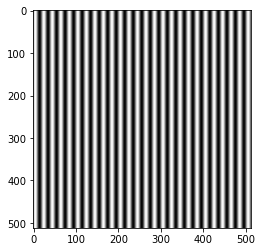

In [9]:
I1 = create_blank(512,512,np.float32,1)
for x in range(512):# x is column
    for y in range(512):# y is row
        I1[y,x] = 1 + np.sin(0.1 * np.pi * x)

I1_ = create_blank(512,512,np.float32,1)
I1_ = cv.normalize(I1,I1_,0,255,cv.NORM_MINMAX)
I1_uint8 = np.uint8(I1_)

plt.imshow(I1_uint8,cmap = "gray", vmin=0,vmax=255)


(512, 512, 1)
(512, 512, 1)


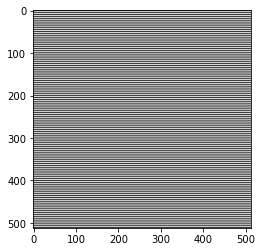

In [47]:
I2 = create_blank(512,512,np.float32,1)
print(I2.shape)
for x in range(512):
    for y in range(512):
        I2[y,x] = 1 + np.cos(np.cos(0.2 * np.pi * y))
        
I2_ = create_blank(512,512,np.float32,1)
I2_ = cv.normalize(I2,I2_,0,255,cv.NORM_MINMAX)
I2_uint8 = np.uint8(I2_)

print(I2_uint8.shape)

plt.imshow(I2_uint8,cmap = "gray", vmin=0,vmax=255)


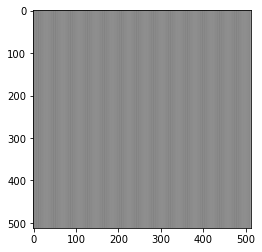

In [24]:
I3 = create_blank(512,512,np.float32,1)
for x in range(512):
    for y in range(512):
        I3[y,x] = 1 + np.cos(np.cos(0.4 * np.pi * x))
        
I3_ = create_blank(512,512,np.float32,1)
I3_ = cv.normalize(I3,I3_,0,255,cv.NORM_MINMAX)
I3_uint8 = np.uint8(I3_)

plt.imshow(I3_uint8,cmap = "gray", vmin=0,vmax=255)


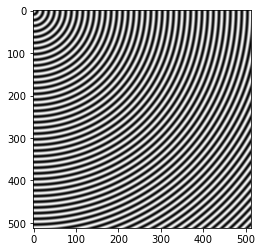

In [29]:
I4 = create_blank(512,512,np.float32,1)
for i in range(512):
    for j in range(512):
        I4[i,j] = 1 + np.sin(0.15 * np.pi * np.sqrt(i**2 + j**2))
        
I4_ = create_blank(512,512,np.float32,1)
I4_ = cv.normalize(I4,I4_,0,255,cv.NORM_MINMAX)
I4_uint8 = np.uint8(I4_)
                             
plt.imshow(I4_uint8,cmap = "gray", vmin=0,vmax=255)


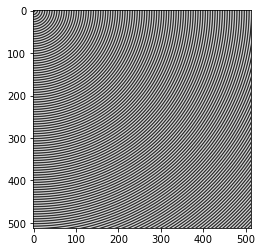

In [30]:
I5 = create_blank(512,512,np.float32,1)
for i in range(512):
    for j in range(512):
        I5[i,j] = 1 + np.sin(0.35 * np.pi * np.sqrt(i**2 + j**2))

        
I5_ = create_blank(512,512,np.float32,1)
 
I5_ = cv.normalize(I5,I5_,0,255,cv.NORM_MINMAX)
I5_uint8 = np.uint8(I5_)

plt.imshow(I5_uint8,cmap = "gray", vmin=0,vmax=255)


In [55]:
cv.imwrite("I1.png",I1_uint8)
cv.imwrite("I2.png",I2_uint8)
cv.imwrite("I3.png",I3_uint8)
cv.imwrite("I4.png",I4_uint8)
cv.imwrite("I5.png",I5_uint8)

True

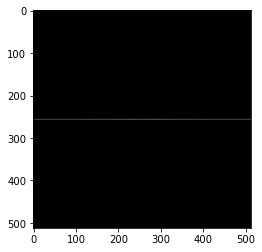

In [53]:
dft_1 = DFT(I1_uint8)

M1 = cv.magnitude(dft_1[0],dft_1[1])
M1 = np.log(M1+0.0001)
P1 = cv.phase(dft_1[0],dft_1[1])

mag1 = DFTShift(M1)

mag1_ = create_blank(512,512,np.float32,1)
mag1_ = cv.normalize(mag1,mag1_,0,255,cv.NORM_MINMAX)
mag1_uint8  = np.uint8(mag1_)


plt.imshow(mag1_uint8,cmap = "gray", vmin=0,vmax=255)

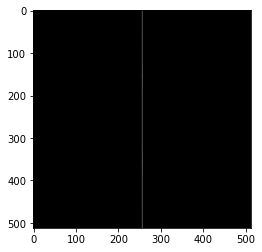

In [27]:
dft_2 = DFT(I2_uint8)

M2 = cv.magnitude(dft_2[0],dft_2[1])
M2 = np.log(M2+0.0001)
P2 = cv.phase(dft_2[0],dft_2[1])
dft_2 = cv.polarToCart(M2,P2)

mag2 = DFTShift(M2)

mag2_ = create_blank(512,512,np.float32,1)
mag2_ = cv.normalize(mag2,mag2_,0,255,cv.NORM_MINMAX)
mag2_uint8  = np.uint8(mag2_)


plt.imshow(mag2_uint8,cmap = "gray", vmin=0,vmax=255)

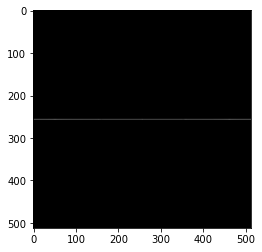

In [28]:
dft_3 = DFT(I3_uint8)

M3 = cv.magnitude(dft_3[0],dft_3[1])
M3 = np.log(M3+0.0001)
P3 = cv.phase(dft_3[0],dft_3[1])
dft_3 = cv.polarToCart(M3,P3)

mag3 = DFTShift(M3)

mag3_ = create_blank(512,512,np.float32,1)
mag3_ = cv.normalize(mag3,mag3_,0,255,cv.NORM_MINMAX)
mag3_uint8  = np.uint8(mag3_)


plt.imshow(mag3_uint8,cmap = "gray", vmin=0,vmax=255)

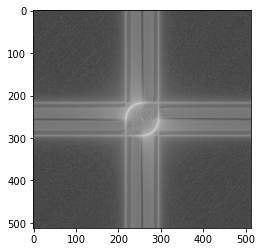

In [40]:
dft_4 = DFT(I4_uint8)

M4 = cv.magnitude(dft_4[0],dft_4[1])
M4 = np.log(M4+0.0001)
P4 = cv.phase(dft_4[0],dft_4[1])
dft_4 = cv.polarToCart(M4,P4)

mag4 = DFTShift(M4)

mag4_ = create_blank(512,512,np.float32,1)
mag4_ = cv.normalize(mag4,mag4_,0,255,cv.NORM_MINMAX)
mag4_uint8  = np.uint8(mag4_)


plt.imshow(mag4_uint8,cmap = "gray", vmin=0,vmax=255)

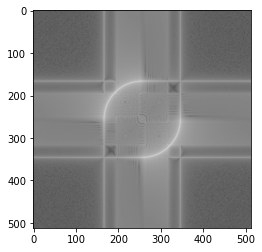

In [32]:
dft_5 = DFT(I5_uint8)

M5 = cv.magnitude(dft_5[0],dft_5[1])
M5 = np.log(M5+0.0001)
P5 = cv.phase(dft_5[0],dft_5[1])
dft_5 = cv.polarToCart(M5,P5)

mag5 = DFTShift(M5)

mag5_ = create_blank(512,512,np.float32,1)
mag5_ = cv.normalize(mag5,mag5_,0,255,cv.NORM_MINMAX)
mag5_uint8  = np.uint8(mag5_)


plt.imshow(mag5_uint8,cmap = "gray", vmin=0,vmax=255)

In [56]:
cv.imwrite("mag1.png",mag1_uint8)
cv.imwrite("mag2.png",mag2_uint8)
cv.imwrite("mag3.png",mag3_uint8)
cv.imwrite("mag4.png",mag4_uint8)
cv.imwrite("mag5.png",mag5_uint8)


True

# Task3

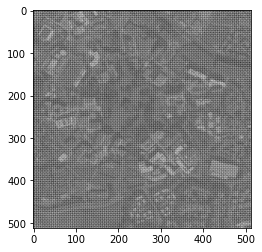

In [3]:
image = cv.imread("./images for PA3/uci.jpg", cv.IMREAD_GRAYSCALE)
plt.imshow(image,cmap = "gray", vmin=0,vmax=255)

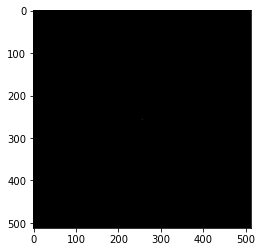

In [4]:
dft_r,dft_i = DFT(image)

mag = cv.magnitude(dft_r,dft_i)
#mag = np.log(mag+0.0001)
mag = DFTShift(mag)

mag_ = create_blank(512,512,np.float32,1)
mag_ = cv.normalize(mag,mag_,0,255,cv.NORM_MINMAX)
mag_uint8  = np.uint8(mag_)

plt.imshow(mag_uint8,cmap = "gray", vmin=0,vmax=255)

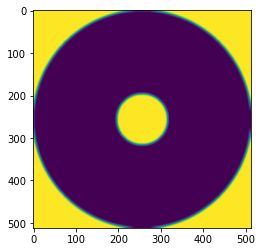

In [5]:
filter = NotchFilter(512, 60, 256)
filter_ = cv.GaussianBlur(filter,(9,9),5)
plt.imshow(filter_)


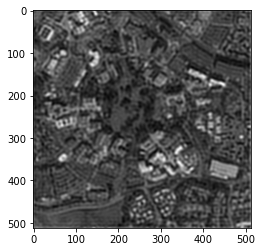

In [9]:
mag = mag*filter_
mag = DFTShift(mag)
pha = cv.phase(dft_r,dft_i)

dft = cv.polarToCart(mag,pha)

img = IDFT(dft[0],dft[1])
img_ = create_blank(512,512,np.float32,1)
img_ = cv.normalize(img,img_,0,255,cv.NORM_MINMAX)
img_uint8  = np.uint8(img_)

plt.imshow(img_uint8,cmap = "gray", vmin=0,vmax=255)

In [7]:
cv.imwrite("uci_denoised.jpg",img_uint8)

True

In [10]:
cv.imwrite("mask.png",filter_)

True

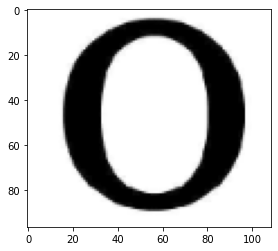

In [19]:
image = cv.imread("./images for PA3/O.png", cv.IMREAD_GRAYSCALE)
plt.imshow(image,cmap = "gray", vmin=0,vmax=255)

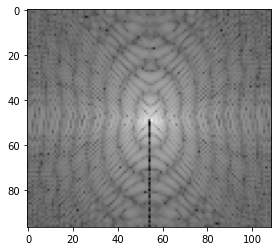

In [23]:
dft_1 = DFT(image)

M1 = cv.magnitude(dft_1[0],dft_1[1])
M1 = np.log(M1+0.0001)
P1 = cv.phase(dft_1[0],dft_1[1])

mag1 = DFTShift(M1)

mag1_ = create_blank(512,512,np.float32,1)
mag1_ = cv.normalize(mag1,mag1_,0,255,cv.NORM_MINMAX)
mag1_uint8  = np.uint8(mag1_)


plt.imshow(mag1_uint8,cmap = "gray", vmin=0,vmax=255)